## Algorithm training, testing, validation, and experiment tracking

In [39]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (14, 10)

### Model training and testing

In [40]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [41]:
# training data
train_df = pd.read_csv('/home/josephitopa/Documents/personal_files/ufuoma/data/cleaned_data/train.csv')
X_train = train_df.drop(['Radiation'], axis = 1)
y_train = train_df['Radiation']

# test data
test_df = pd.read_csv('/home/josephitopa/Documents/personal_files/ufuoma/data/cleaned_data/test.csv')
X_test = test_df.drop(['Radiation'], axis = 1)
y_test = test_df['Radiation']

In [42]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Temperature    835 non-null    float64
 1   CloudOpacity   835 non-null    float64
 2   DHI            835 non-null    float64
 3   DNI            835 non-null    float64
 4   Precipitation  835 non-null    float64
 5   Humidity       835 non-null    float64
 6   Pressure       835 non-null    float64
 7   WindDirection  835 non-null    float64
 8   WindSpeed      835 non-null    float64
 9   Month          835 non-null    int64  
 10  Day            835 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 71.9 KB


### Linear Regression

In [43]:
# Setup the pipeline steps for linear regression
#steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]
# Create the pipeline
linear_regression = LinearRegression()#Pipeline(steps)
# Fit the pipeline to the train set
linear_regression.fit(X_train, y_train)
# Predict the labels of the test set
# y_pred_lr = linear_regression.predict(X_test)

LinearRegression()

In [26]:
#Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score 0.9839431005262708
Root Mean Squared Error: 3.15
Root Mean Absolute Error: 2.68


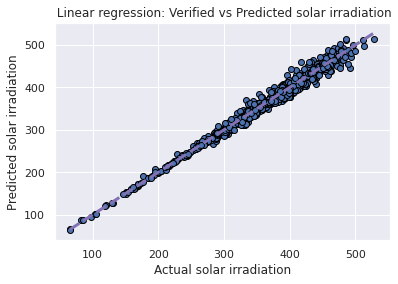

In [27]:
#Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Verified vs Predicted solar irradiation")
plt.savefig("lr_line_of_fit.jpg")
plt.show()

/home/josephitopa/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


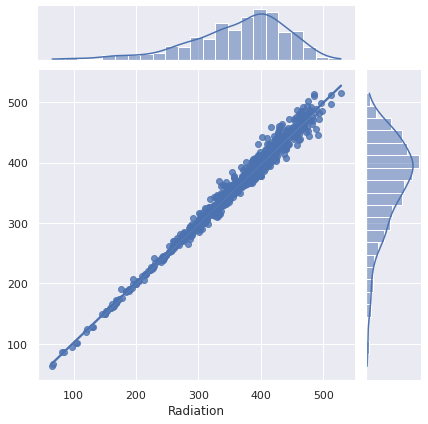

In [8]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.savefig("lr_jointplot.jpg")
plt.show()

### Random Forest Regressor

In [9]:
# Setup the pipeline steps for random forest: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]
# Create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

In [10]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared=False)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score 0.9851314299861212
Root Mean Squared Error: 3.09
Root Mean Absolute Error: 2.59


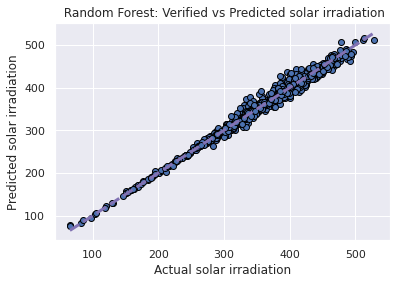

In [11]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.savefig("rfr_line_of_fit.jpg")
plt.show()

/home/josephitopa/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


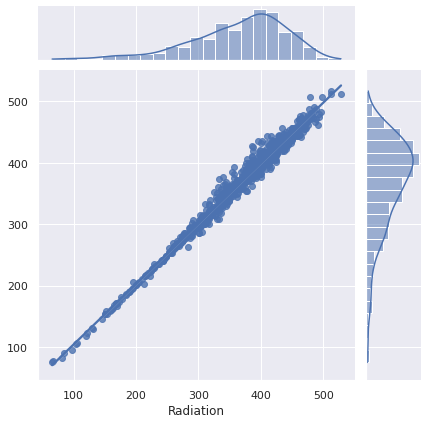

In [12]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.savefig("rfr_jointplot.jpg")
plt.show()

### GradientBoosting Regressor

In [13]:
# Setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]
# Create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)
# Fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)
# Predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

In [14]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))

r2_score 0.9836240114454794
Root Mean Squared Error: 3.17
Root Mean Absolute Error: 2.68


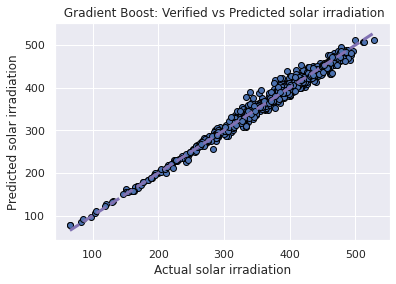

In [15]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.savefig("gbr_line_of_fit.jpg")
plt.show()

/home/josephitopa/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


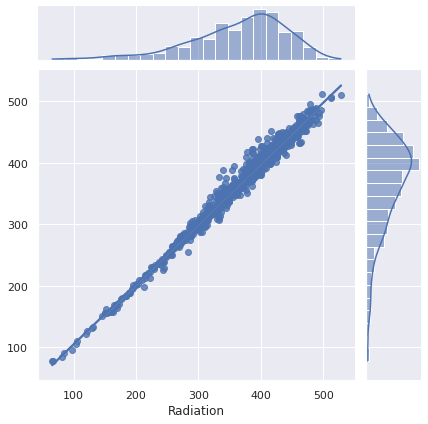

In [16]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.savefig("gbr_jointplot.jpg")
plt.show()

### Model Validation

In [17]:
# validation data
val_df = pd.read_csv('/home/josephitopa/Documents/personal_files/ufuoma/data/cleaned_data/validation.csv')
X_val = val_df.drop(['Radiation'], axis = 1)
y_val = val_df['Radiation']

In [18]:
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = pipeline_rfr.predict(X_val)
y_val_gbr = pipeline_gbr.predict(X_val)

In [19]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)

mae_lr_val = mean_absolute_error(y_val, y_val_lr)

print('r2_score', r2_score(y_val, y_val_lr))

print('Linear Regression - Root Mean Squared Error: %.2f' % np.sqrt(mse_lr_val))

print('Linear Regression - Root Mean Absolute Error: %.2f' % np.sqrt(mse_lr_val))

r2_score 0.9837053392356897
Linear Regression - Root Mean Squared Error: 3.16
Linear Regression - Root Mean Absolute Error: 3.16


In [20]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)

mae_rf_val = mean_absolute_error(y_val, y_val_rfr)

print('r2_score', r2_score(y_val, y_val_rfr))

print('Random Forest - Root Mean Squared Error: %.2f' % np.sqrt(mse_rf_val))

print('Random Forest - Root Mean Absolute Error: %.2f' % np.sqrt(mse_rf_val))

r2_score 0.9859292761911688
Random Forest - Root Mean Squared Error: 3.04
Random Forest - Root Mean Absolute Error: 3.04


In [21]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)

mae_gbr_val = mean_absolute_error(y_val, y_val_gbr)

print('r2_score', r2_score(y_val, y_val_gbr))

print('Gradient Boost - Root Mean Squared Error: %.2f' % np.sqrt(mse_gbr_val))

print('Gradient Boost - Root Mean Absolute Error: %.2f' % np.sqrt(mae_gbr_val))

r2_score 0.9849431438595198
Gradient Boost - Root Mean Squared Error: 3.10
Gradient Boost - Root Mean Absolute Error: 2.65


### Explainability

In [48]:
df = pd.read_csv('/home/josephitopa/Documents/personal_files/ufuoma/data/cleaned_data/model.csv')
X = df.drop("Radiation", axis = 1)

In [52]:
import shap

explainer = shap.KernelExplainer(linear_regression.predict, X_train) #shap.Explainer(linear_regression)

X does not have valid feature names, but LinearRegression was fitted with feature names
Using 3895 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [ ]:
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test)

  0%|          | 0/835 [00:00<?, ?it/s]

X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names
X does not have valid feature names, but LinearRegression was fitted with feature names


In [ ]:
# visualize the first prediction
shap.plots.waterfall(shap_values[0])

In [ ]:
# visualize the second prediction
shap.plots.waterfall(shap_values[1])

In [ ]:
#the overall impact of these features across multiple instances using SHAP summary plot
shap.summary_plot(shap_values, X)

In [ ]:
# global feature importance
shap.plots.bar(shap_values)

## Experiment tracking with neptune

In [23]:
# Terminal
# !pip install neptune-notebooks
# jupyter nbextension enable --py neptune-notebooks
# !pip install neptune-client==0.14.2
#!pip install neptune-client neptune-sklearn
# !pip install neptune-sklearn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.9/300.9 KB 318.1 kB/s eta 0:00:001m300.3 kB/s eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for neptune-client: filename=neptune_client-0.14.2-py2.py3-none-any.whl size=528176 sha256=b8fe136d2aa2dc054a1c91e5df3162425fb69d55bc78c0740e53147e68e6cd30
  Stored in directory: /home/josephitopa/.cache/pip/wheels/dd/39/c6/b033e4859916c3c56f966b9cb3835982ef3f147b1838972621
Successfully built neptune-client


In [24]:
# import neptune libraries and sklearn integration
import neptune.new as neptune
import neptune.new.integrations.sklearn as npt_utils

run = neptune.init(api_token = "eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiIxZGI1ZjU1MC0yMDhkLTQ5NWMtYTQzYy0xOGMzMTBmNGZlMTUifQ==",
                   project = "ufuomarorobi/solar-irradiation-prediction-2022",
                   name = 'predicting-solar-irradiation',
                   source_files = ["training-and-experiment_tracking.ipynb"])

UnsupportedClientVersion: 
[95m
----UnsupportedClientVersion-------------------------------------------------------------
[0m
Your version of neptune-client (0.14.0) library is not supported by the Neptune server.

Please install neptune-client>=0.14.2

[92mNeed help?[0m-> https://docs.neptune.ai/getting-started/getting-help


In [22]:
# Track files, models, and folders
# Folders
run["cleaned_datasets"].track_files("~/Documents/Projects/update_project/My_Best_Projects/Solar_Energy_Project/datasets/cleaned")
run["raw_datasets"].track_files("~/Documents/Projects/update_project/My_Best_Projects/Solar_Energy_Project/datasets/raw")

# Folder
run["notebooks"].track_files("~/Documents/Projects/update_project/My_Best_Projects/Solar_Energy_Project/notebooks/")

In [23]:
# train, and test; while tracking the experiment
run['lr_summary'] = npt_utils.create_regressor_summary(pipeline_lr, X_train, X_test, y_train, y_test)

run['gbr_summary'] = npt_utils.create_regressor_summary(pipeline_gbr, X_train, X_test, y_train, y_test)

run['rfr_summary'] = npt_utils.create_regressor_summary(pipeline_rfr, X_train, X_test, y_train, y_test)

Did not log feature importance chart. Error: could not find feature importances param on Pipeline
Did not log feature importance chart. Error: could not find feature importances param on Pipeline
Did not log feature importance chart. Error: could not find feature importances param on Pipeline


In [24]:
# stop experiment
run.stop()

Shutting down background jobs, please wait a moment...
Done!


Waiting for the remaining 42 operations to synchronize with Neptune. Do not kill this process.


All 42 operations synced, thanks for waiting!


### Export models

In [34]:
# check sklearn version
from sklearn import __version__

print(__version__)

# pip install scikit-learn==0.24.1

1.1.1


In [22]:
# loading libraries
import joblib

# Save Models to file in the model directory
# save linear regression model
joblib_lr = "model_lr.pkl"  
joblib.dump(pipeline_lr, joblib_lr)
# save random forest model
joblib_rfr = "model_rfr.pkl" 
joblib.dump(pipeline_rfr, joblib_rfr)
# save gradientboost model
joblib_gbr = "model_gbr.pkl"  
joblib.dump(pipeline_gbr, joblib_gbr)

['model_gbr.pkl']

### Recommended reading

1. https://docs.neptune.ai/integrations-and-supported-tools/model-training/sklearn

2. https://mlflow.org/docs/latest/tracking.html#scenario-1-mlflow-on-localhost

3. https://docs.neptune.ai/getting-started/examples#data-versioning 